# COGS 108 - Final Project 

# Overview

This project aimed to answer whether zip codes and the number of health inspection violations received are correlated with one another. In analyzing data recieved from North Carolina involving their helath inspection reports over time, it was shown that zip codes and number of infractions are indeed correlated. To account for wealth of the zip code confounding these results, the correlation between zip code and average price of each location was analyzed as well and found that these are not correlated and in turn does not confound the findings of this project.

# Name & GitHub

- Name: Griffin Goldberg
- GitHub Username: gtgoldbe

# Research Question

Is there a way to determine a correlation between zip codes and health inspection infractions in order to better identify which of those establishments are more at risk for a violation and more efficiently dedicate the resources of the Los Angelos County Department of Public Health?

## Background and Prior Work

Health Inspections are conducted by local governments in order to assess resturants and ensure safe practices are being executed in order to maintain public health. This can be a difficult process, as many departments have a small number of inspectors and thousands of establishments to carefully assess each year.

Some attempts at establishing a predictive model for high-risk establishment have been made with some success. One model used data from health inspections conducted in New York City from 2011-2014. This model found correlational relationships between the types of violations and probability of future violations, as well as the culture of the establishment (American, Chinese, Italian, etc) bring an important factor in considering risk of future violations (1).

Another model, created for the Chicago health inspection department, built a predictive model to better efficiently assign inspectors to establishments to find violations about 7.5 days faster than without a model. This model relied on several categories, including previous scores and nearby complaints, to assess resturant risks (2).

References (include links):
- 1)https://harvarddatasciencerestaurantinspections.wordpress.com/
- 2)https://www.citylab.com/solutions/2016/01/chicago-is-predicting-food-safety-violations-why-arent-other-cities/422511/

# Hypothesis


Null Hypothesis: There is no correlation between zip code and number of health infractions within that zip code, and therefore could not be used in a model to better predict resturants at higher risk of committing a health violation.

Alternative Hypothesis:
There is a way to create a predictive model to more accurately predict resturants more at risk for health violations in order to more efficiently dedicate LA County health inspection resources, by comparing zip codes to number of infractions.

There have been successful models in the past that have improved prediction for both New York City and Chicago. I believe that it is also possible to create a working model for Los Angelos, in focusing on the relationship between zip code and number of violations.

# Dataset(s)

- Dataset Name: inspections.csv
- Number of observations: 18466
- Summary: This dataset includes health inspection report data for more than 3000 different locations, with some locations having records of multiple inspections from prior years. The data for each report includes the number of violations for that inspection, as well as average violations for that location's neighbors.

- Dataset Name: yelp.csv
- Number of observations: 3688
- Summary: This dataset includes yelp reviews for over 3000 different locations. Some of the data in each review include the rating, location, price, and number of reviews for that location.

My intention was to primarily make use of the inspections.csv dataset to determine if zip code and number of violations are indeed correlated and can be sufficient to use to improve upon previous models. The yelp dataset is used to determine if wealth and average price of a zip code are a confounding variable for number of violations and did not need to be merged with the inspections.csv dataset.

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import numpy as np

First, I read in the two datasets as DataFrames and looked at the shape of the data.

In [2]:
my_df_insp = pd.read_csv('inspections.csv')
my_df_insp

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,...,13,1.0,4.0,1.000000,4.777778,4.692525,9.863838,4.092022e+09,4.092017e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,...,3,2.0,5.0,0.750000,3.250000,5.853333,5.972381,4.092013e+09,4.092016e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,...,4,0.0,2.0,0.875000,1.750000,2.466667,3.000000,4.092017e+09,4.092015e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,...,2,0.0,3.0,1.111111,2.000000,3.737302,4.606349,4.092016e+09,4.092015e+09,1


In [3]:
print('Number of unique locations: ' + str(len(my_df_insp['hsisid'].unique())))

Number of unique locations: 3045


In [4]:
my_df_yelp = pd.read_csv('yelp.csv')
my_df_yelp

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,carter-finley-stadium-raleigh,carter-finley stadium,False,3.5,23,4600 Trinity Rd,27607,35.801217,-78.719568,19198344000,...,False,False,False,False,False,False,False,False,False,False
3684,raleigh-little-theatre-raleigh,raleigh little theatre,False,3.5,24,301 Pogue St,27607,35.791430,-78.668820,19198213111,...,False,False,False,False,False,False,False,False,False,False
3685,sky-zone-trampoline-park-durham-durham,"sky zone trampoline park, durham",False,4.0,12,1720 Guess Rd,27701,36.020901,-78.914003,19194250800,...,False,False,False,False,False,False,False,False,False,False
3686,highgrove-estate-fuquay-varina,highgrove estate,False,3.5,4,1613 S Main St,27526,35.557201,-78.807747,19195526154,...,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

First I removed all non-essential columns and ones which violated ethical guidelines, such as names and phone numbers. Then I sorted each dataset by zip code and standardized the data to more easily work with it. Lastly, I created smaller subsets DataFrames of the particular columns I intended to analyze.

In [5]:
my_df_insp = my_df_insp.drop(['name','type', 'address1', 'address2', 
                              'city', 'phonenumber', 'date', 'restaurantopendate', 
                              'postalcode', 'description', 'inspection_num', 'inspector_id', 
                              'inspectedby', 'state', 'facilitytype', 'x', 'y', 'geocodestatus', 
                              'previous_inspection_date', 'days_since_previous_inspection'], axis = 1)
my_df_insp

,hsisid,days_from_open_date,zip,previous_inspection_by_same_inspector,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,3562,27610,NaN,96.0,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,3062,27610,NaN,98.0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,1509,27610,NaN,97.0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,177,27513,NaN,99.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,1670,27597,NaN,97.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,5190,27616,False,93.0,6,13,1.0,4.0,1.000000,4.777778,4.692525,9.863838,4.092022e+09,4.092017e+09,1
18462,4092110100,7730,27513,True,97.0,2,3,2.0,5.0,0.750000,3.250000,5.853333,5.972381,4.092013e+09,4.092016e+09,1
18463,4092110487,2547,27519,False,96.0,3,4,0.0,2.0,0.875000,1.750000,2.466667,3.000000,4.092017e+09,4.092015e+09,1
18464,4092300177,5969,27603,False,99.0,1,2,0.0,3.0,1.111111,2.000000,3.737302,4.606349,4.092016e+09,4.092015e+09,1


In [6]:
my_df_yelp = my_df_yelp.drop(['id', 'name', 'address1', 'phone'], axis = 1)
my_df_yelp = my_df_yelp.sort_values('zip_code')

my_df_yelp

,is_closed,rating,review_count,zip_code,latitude,longitude,price,hotdogs,sandwiches,pizza,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
2213,False,1.0,1,15035,35.709239,-78.621230,NaN,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3493,False,4.0,77,22701,35.996080,-78.901860,$$$,False,False,False,...,False,True,False,False,False,False,False,False,False,False
49,False,4.0,33,27023,36.101214,-80.411814,$$,False,False,False,...,True,False,False,False,False,False,False,False,False,False
47,False,3.5,4,27023,36.078462,-80.388963,$,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,False,4.5,20,27041,36.377449,-80.484940,$,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,False,5.0,1,28557,34.730420,-76.777380,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,5.0,5,28573,35.007890,-77.219700,$$$,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,False,5.0,4,28578,35.226116,-77.846352,$,False,False,False,...,False,False,False,False,False,False,False,False,False,False
947,False,5.0,2,28587,35.981871,-78.539078,$,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Not all the price ratings were consistent, so i designed a function to make all price ratings consistent and easy to work with.
0 is equivalent to the cheapest rating and 3 is equivalent to the most expensive rating. In deciding how to treat NaN ratings, I did not want to ignore them and decided to treat them just like the random large number ratings.

In [7]:
my_df_yelp['price'].unique()

array([nan, '$$$', '$$', '$', '$$$$', '19197793900', '19193870228',
       '19194811105', '19194660360', '19194660308', '19194607025',
       '19195526154', '19192666118', '19196000870', '19194692122',
       '19198407700', '19195214445', '19198884887', '19198824629',
       '18775769464', '19198320501', '19194362246', '19198500891',
       '19198217991', '19198344000', '19198213111', '19197843100',
       '19198217400', '19198473548', '19197822594', '19196150592',
       '19198469808', '19199869521', '19195827000', '19198484906',
       '19194250800', '19194899364', '19108685071', '19106926261'],
      dtype=object)

In [8]:
def normYelpPrice(string):
    """ Normalizes all prices for the
        yelp.csv dataset in order to 
        better analyze this data.

        Parameters
        ----------
        string : a string
            input to be normalized into
            an integer

        Returns
        -------
        int
            integer representation of price
    """
    
    if string == '$':
        return 0
    elif string == '$$':
        return 1
    elif string == '$$$':
        return 2
    elif string == '$$$$':
        return 3
    else:
        return 3

In [9]:
my_df_yelp['price'] = my_df_yelp['price'].apply(normYelpPrice)
my_df_yelp['price'].unique()

array([3, 2, 1, 0], dtype=int64)

Here is where I created the smaller subsets of just the data I wanted to analyze.

In [10]:
my_df_pzip = my_df_yelp[['zip_code','price']]
my_df_naw = my_df_insp[['zip', 'num_critical']]
my_df_naw.columns = ['zip_code', 'num_critical']

Then I wanted to sort the two small Data Frames by resetting their indexes.

In [11]:
my_df_pzip = my_df_pzip.reset_index()
my_df_pzip = my_df_pzip.drop(['index'], axis = 1)

my_df_naw = my_df_naw.reset_index()
my_df_naw = my_df_naw.drop([ 'index'], axis = 1)
my_df_naw = my_df_naw.sort_values('zip_code')

To address the concern of the zip codes possibly revealing private information, as well as being more readable on a graph, I encrypt the zip codes of all the locations. The reasoning behind this is that I do not care about a particular zip code, I just want to analyze any trends between zip codes and inspection reports.

In [12]:
def hide_zips(all_zips):
    """ Encrypts the input of numbers
        while maintaining the number of
        copies of each original number
        and original order.

        Parameters
        ----------
        all_zips : a list
            list of numbers to be encrypted.
            may contain duplicate numbers.

        Returns
        -------
        list
            the encrypted list of numbers
    """
    
    int_zips = []
    #To account for list of strings of integers
    for item in all_zips:
        int_zips.append(int(item))
        
    last_zip = 0
    num = 1
    hidden = []
    
    for item in int_zips:
        #only for first number in list
        if last_zip == 0:
            last_zip = item
            hidden.append(num)
            
        else:
            #Case where number was duplicate of the
            #previous number
            if item == last_zip:
                hidden.append(num)
                
            else:
                num += 1
                last_zip = item
                hidden.append(num)
                
    return hidden

In [13]:
my_df_pzip['zip_code'] = hide_zips(my_df_pzip['zip_code'])
my_df_naw['zip_code'] = hide_zips(my_df_naw['zip_code'])

# Data Analysis & Results

First I analyzed whether zip codes and number of critical violations were correlated. To accomplish this task, I first obtained a p-value.

In [14]:
st_co, p_co = normaltest(a = my_df_naw['num_critical'])
p_co

0.0

In [15]:
pv = pd.pivot_table(my_df_naw, values = 'num_critical', index = ['zip_code'])
pv

,num_critical
zip_code,
1,6.000000
2,2.972686
3,2.910381
4,3.111111
5,4.368356
6,1.924419
7,2.772334
8,1.230769
9,0.500000


In order to obtain a line of best fit with maximum flexibility, I created my own function to accomplish this.

In [16]:
def best_fit_line(x_values, y_values):
    """ Creates variables for the slope
        and intercept for a line of best 
        fit.

        Parameters
        ----------
        x_values : a list
            data from x-axis in original dataset
        y_values: a list
            data from y-axis in original dataset
        Returns
        -------
        float, float
            the slope for the line formula,
            the y-intercept for the line formula
    """
    x_mean = 0
    y_mean = 0
    slope = 0.0
    intercept = 0.0
    
    x_mean = find_mean(x_values)
    y_mean = find_mean(y_values)
    
    slope = find_slope(x_values, y_values, x_mean, y_mean)
    intercept = find_intercept(slope, x_mean, y_mean)
    
    return slope,intercept

def find_mean(values):
    """ Helper function for best_fit_line.
        finds the mean of given values.

        Parameters
        ----------
        values: a list
            list of data to get the mean from

        Returns
        -------
        float
            the mean of inputted data
    """
    total = 0
    num = 0
    
    for item in values:
        total += item
        num += 1
        
    return total / num
    
def find_slope(x, y, x_mean, y_mean):
    """ Helper function for best_fit_line.
        Finds the slope of the given inputs.

        Parameters
        ----------
        x: list
            The x data
        y: list
            The y data
        x_mean : float
            The mean of the x-data
        y_mean: float
            The mean of the y-data

        Returns
        -------
        float
            the slope of the data given the two means.
    """
    total_num = 0
    total_den = 0
    counter = 0
    
    while counter < len(x):
        #numerator of the slope equation
        total_num += (x[counter] - x_mean) * (y[counter] - y_mean)
        #denominator of the slope equation
        total_den += (x[counter] - x_mean) * (x[counter] - x_mean)
        counter = counter + 1
        
    return total_num / total_den

def find_intercept(m, x_mean, y_mean):
    """ Helper function for best_fit_line.
        Finds the y-intercept of the given inputs.

        Parameters
        ----------
        m: float
            The slope of the data
        x_mean : float
            The mean of the x-data
        y_mean: float
            The mean of the y-data

        Returns
        -------
        float
            the y-intercept of the data given the rest of the equation.
    """
    return y_mean - m * x_mean

In [17]:
slope,intercept = best_fit_line(my_df_naw['zip_code'].values, my_df_naw['num_critical'].values)
regression_lin = [(slope*x)+intercept for x in my_df_naw['zip_code']]

Below is the results for the regression summary for comparing zip code to number of critical health violations.

In [18]:
outcome_1, predictors_1 = patsy.dmatrices('num_critical ~ zip_code', data = my_df_naw)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [19]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           num_critical   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           2.57e-33
Time:                        18:14:11   Log-Likelihood:                -45206.
No. Observations:               18466   AIC:                         9.042e+04
Df Residuals:                   18464   BIC:                         9.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2980      0.043     76.851      0.0

Then to check if there was a confounding variable, I analyzed whether average price of locations within zip codes was correlated.

In [20]:
st_cp, p_cp = normaltest(a = my_df_pzip['price'])
p_cp

1.1927085189540998e-176

In [21]:
pa = pd.pivot_table(my_df_pzip, values = 'price', index = ['zip_code'])
pa

,price
zip_code,
1,3.0
2,2.0
3,0.5
4,0.0
5,0.0
...,...
113,3.0
114,2.0
115,0.0


For creating a line of best fit.

In [22]:
m,b = best_fit_line(my_df_pzip['zip_code'].values, my_df_pzip['price'].values)
regression_line = [(m*x)+b for x in my_df_pzip['zip_code']]

In [23]:
outcome_1, predictors_1 = patsy.dmatrices('price ~ zip_code', data = my_df_pzip)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [24]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02500
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.874
Time:                        18:14:11   Log-Likelihood:                -5687.3
No. Observations:                3688   AIC:                         1.138e+04
Df Residuals:                    3686   BIC:                         1.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1149      0.055     20.250      0.0

# Ethics & Privacy

The data provided by the LA County Department of Public Health is publicly available, as well as review scores on sites such as Yelp. To protect the privacy of individual establishments, the data provided by this model will not be publicly available, only to the LA County Department of Public Health would this data be released to. As this data was collected by humans during in-person inspections, there is the potential for bias, such as an inspector giving resturaunts owned by one of a certain race lower scores than onwers of another race. As this data will not become publicly available, for use solely by the LA County health inspectors, there is little to no risk for equitable impact or risk of loss of privacy for establishments and their employees/customers. 

To handle the risk of any privacy violations, only the scores each establishment receives will be available to the health inspectors as well as the corresponding names. This should ensure that only the creators and analyzers of the model and its results know why establishments receive their scores and not release that information to the public, only the letter grade they receive from health inspectors.

None of the data released from this project contains identifying information, the zip codes are encrypted and the personal information of resturant owners, yelp reviewers, and the health inspectors are not released.

# Conclusion & Discussion

This project was designed to look at trends across zip codes, namely number of health inspection infractions received by locations across zip codes. The purpose of this project was to gain knowledge of these trends in order for them to be useful in improving existing models for predicting high-risk locations for health violations.

When analyzing the OLS Regresion results for number of critical violations to zip code, with an alpha value of 0.01, the p-value of 0.00 is less than alpha value, we can reject the null hypothesis that there is no correlation between zip codes and number of critical health inspection violations.

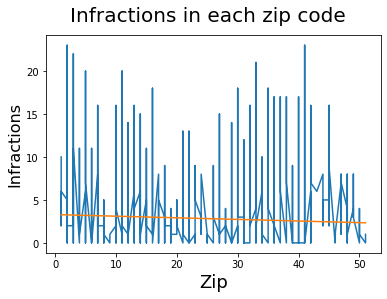

In [25]:
# Here is a graph of the data with the line of best fit overlaying the graph.
fig = plt.figure()
plt.plot(my_df_naw['zip_code'], my_df_naw['num_critical'])
plt.plot(my_df_naw['zip_code'], regression_lin)
fig.suptitle('Infractions in each zip code', fontsize=20)
plt.xlabel('Zip', fontsize=18)
plt.ylabel('Infractions', fontsize=16)
fig.savefig('Num_crit.jpg')

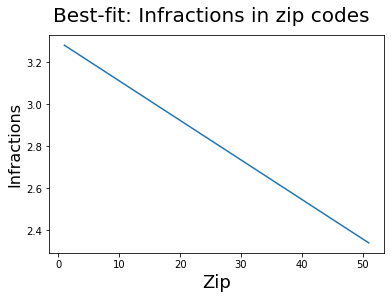

In [26]:
# A close-up on the line.
fig = plt.figure()
plt.plot(my_df_naw['zip_code'], regression_lin)
fig.suptitle('Best-fit: Infractions in zip codes', fontsize=20)
plt.xlabel('Zip', fontsize=18)
plt.ylabel('Infractions', fontsize=16)
fig.savefig('Num_crit_line.jpg')

Even with a very low p-value, I wanted to ensure this was not due to a confounding variable, so after analyzing the OLS Regression for price compared to zip codes, with an alpha value of 0.01, the p-value of 0.874 is not less than the alpha value, so we fail to reject the null hypothesis in this case. The null hypothesis is that price is not correlated to zip codes. As this possible confounding variable did not receive a low enough p-value it is safer to conclude that we can reject my original null hypothesis, that zip codes did not correlate with number of health violations.

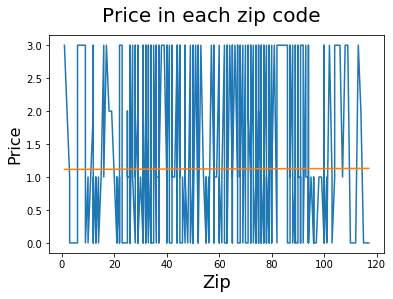

In [27]:
# Here is a graph of the data with the line of best fit overlaying the graph.
fig = plt.figure()
plt.plot(my_df_pzip['zip_code'], my_df_pzip['price'])
plt.plot(my_df_pzip['zip_code'], regression_line)
fig.suptitle('Price in each zip code', fontsize=20)
plt.xlabel('Zip', fontsize=18)
plt.ylabel('Price', fontsize=16)
fig.savefig('Price_zip.jpg')

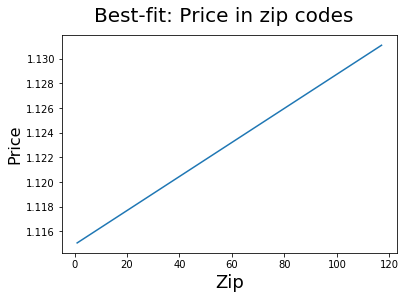

In [28]:
# A close-up on the line.
fig = plt.figure()
plt.plot(my_df_pzip['zip_code'], regression_line)
fig.suptitle('Best-fit: Price in zip codes', fontsize=20)
plt.xlabel('Zip', fontsize=18)
plt.ylabel('Price', fontsize=16)
fig.savefig('Price_zip_line.jpg')

This project was limited in that it only addressed one possible confounding variable. Also as I only analyzed trends across zip codes this project would be benefitted in the randomization of locations and repeated testing of p-values to ensure that this result was not due to random chance caused by the order of the zip codes. This project was designed with LA county in mind and was limited in only North Carolina helath inspection data being utilized.